<h1>PRE</h1>

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, OneHotEncoder


from keras.models import Sequential
from keras.layers import Dense


dateipfad = "C:\\Users\\AMeinert\\Documents\\Python_Scripts\\projects\\MA\\data\\share\\"
datei = "selected_features.csv"

data = pd.read_csv(dateipfad + datei, sep=";", encoding="ISO-8859-1")

data.dtypes

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


DEM_3_29                          float64
GEB_6_4                           float64
DEM_2_4                           float64
HH_4_4                            float64
WHG_4_2                           float64
osm_nodes_counter                   int64
BEV_INSGESAMT                       int64
BEV_JE_QM                           int64
FLAECHE_QM                        float64
ANTEIL_ARBEITSLOSE                float64
ANTEIL_ARBEITSLOSE_ALTER_15_24    float64
ANTEIL_SIEDLUNG_VERKEHR           float64
EINK_JE_EINW                      float64
WHG_6_5                           float64
BESIEDLUNGSSCHLUESSEL               int64
REGIONSTYP                         object
revenue_sum1                      float64
revenue_sum2                      float64
revenue_avg2                      float64
revenue_avg1_per_head             float64
revenue_avg2_per_head             float64
revenue_avg1                      float64
dtype: object

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_error, r2_score, median_absolute_error


def get_regression_metrics(y_true, y_pred):
    
    mse = mean_squared_error(y_true, y_pred)
    rmse = (mse**0.5)
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    metrics = pd.Series(data=[mse,rmse, mae, medae, r2], index=["mse", "rmse", "mae", "medae", "r2"])
    
    return metrics

<h1>CONFIGURE MODEL</h1>

In [3]:
# seeds
np.random.seed(42)
seed = 42

#scaler = MinMaxScaler()
scaler = StandardScaler()
#scaler = RobustScaler()
#scaler = QuantileTransformer()


input_features = ["DEM_3_29", 
              "GEB_6_4",
              "DEM_2_4",
              "HH_4_4",
              "WHG_4_2",
              "osm_nodes_counter",
              "BEV_INSGESAMT",
              "BEV_JE_QM",
              "FLAECHE_QM",
              "ANTEIL_ARBEITSLOSE",
              "ANTEIL_ARBEITSLOSE_ALTER_15_24",
              "ANTEIL_SIEDLUNG_VERKEHR",
              "EINK_JE_EINW",
              "WHG_6_5",
              "BESIEDLUNGSSCHLUESSEL_1",
              "BESIEDLUNGSSCHLUESSEL_2",
              "BESIEDLUNGSSCHLUESSEL_3"]

pred_col = "revenue_avg1"
#pred_col = "revenue_avg1_per_head"



test_set_size = 0.2


## Rohform des Modells
NN = Sequential()

## EIngabeschicht 
NN.add(Dense(5,input_dim=len(input_features), 
             kernel_initializer="random_uniform", activation="relu"))

## Zwischenschichten
NN.add(Dense(10,kernel_initializer="normal", activation="relu"))
NN.add(Dense(30,kernel_initializer="normal", activation="relu"))
NN.add(Dense(9,kernel_initializer="normal", activation="relu")) 
NN.add(Dense(3,kernel_initializer="normal", activation="relu")) 

## Ausgabeschicht
NN.add(Dense(1,kernel_initializer="random_uniform", activation="linear"))

## Modell bauen
NN.compile(loss="mean_absolute_error", optimizer="adam") 


<h1 align="center">FEATURE TRANSFORMATION</h1>
<ol>
    <li>Kategoriale Variablen (indexiert) in binäre Vektoren (get_dummies)</li>
</ol>

In [4]:
data_transformed =  pd.get_dummies(data, columns=["BESIEDLUNGSSCHLUESSEL"])

In [5]:
data_transformed.dtypes

DEM_3_29                          float64
GEB_6_4                           float64
DEM_2_4                           float64
HH_4_4                            float64
WHG_4_2                           float64
osm_nodes_counter                   int64
BEV_INSGESAMT                       int64
BEV_JE_QM                           int64
FLAECHE_QM                        float64
ANTEIL_ARBEITSLOSE                float64
ANTEIL_ARBEITSLOSE_ALTER_15_24    float64
ANTEIL_SIEDLUNG_VERKEHR           float64
EINK_JE_EINW                      float64
WHG_6_5                           float64
REGIONSTYP                         object
revenue_sum1                      float64
revenue_sum2                      float64
revenue_avg2                      float64
revenue_avg1_per_head             float64
revenue_avg2_per_head             float64
revenue_avg1                      float64
BESIEDLUNGSSCHLUESSEL_1             uint8
BESIEDLUNGSSCHLUESSEL_2             uint8
BESIEDLUNGSSCHLUESSEL_3           

In [6]:
data_transformed.head(20)

,DEM_3_29,GEB_6_4,DEM_2_4,HH_4_4,WHG_4_2,osm_nodes_counter,BEV_INSGESAMT,BEV_JE_QM,FLAECHE_QM,ANTEIL_ARBEITSLOSE,...,REGIONSTYP,revenue_sum1,revenue_sum2,revenue_avg2,revenue_avg1_per_head,revenue_avg2_per_head,revenue_avg1,BESIEDLUNGSSCHLUESSEL_1,BESIEDLUNGSSCHLUESSEL_2,BESIEDLUNGSSCHLUESSEL_3
0,217.0000,376.0000,4613.0000,4088.0000,608.0000,254,13120,201,65.2400,8.4000,...,stadt,4787567.8200,4787567.8200,4787567.8200,364.9100,364.9100,4787567.8200,0,0,1
1,384.0000,707.0000,8764.0000,7090.0000,1342.0000,408,20886,653,31.9700,8.4000,...,stadt,21176682.5100,21176682.5100,10588341.2600,506.9600,506.9600,10588341.2600,0,0,1
2,6.0000,4.0000,221.0000,191.0000,20.0000,17,599,66,9.0700,8.4000,...,gem,nan,nan,nan,nan,nan,nan,0,0,1
3,21.0000,9.0000,435.0000,283.0000,33.0000,13,1076,74,14.5500,8.4000,...,gem,nan,nan,nan,nan,nan,nan,0,0,1
4,72.0000,127.0000,1493.0000,1227.0000,198.0000,65,4237,377,11.2300,8.4000,...,gem,nan,nan,nan,nan,nan,nan,0,0,1
5,6.0000,nan,238.0000,180.0000,9.0000,15,670,95,7.0200,8.4000,...,gem,nan,nan,nan,nan,nan,nan,0,0,1
6,21.0000,19.0000,529.0000,397.0000,31.0000,22,1367,148,9.2100,8.4000,...,gem,nan,nan,nan,nan,nan,nan,0,0,1
7,11.0000,12.0000,295.0000,199.0000,18.0000,12,781,61,12.7900,8.4000,...,gem,nan,nan,nan,nan,nan,nan,0,0,1
8,6.0000,6.0000,185.0000,148.0000,3.0000,5,516,50,10.4000,8.4000,...,gem,nan,nan,nan,nan,nan,nan,0,0,1
9,7.0000,3.0000,430.0000,325.0000,12.0000,22,1234,226,5.4600,8.4000,...,gem,nan,nan,nan,nan,nan,nan,0,0,1


<h1 align="center"> TEST UND TRAININGS DATEN ERZEUGEN <u>FÜR STADT MODELL</u></h1>

In [7]:
data_transformed_not_null = data_transformed.dropna(subset = input_features)

learning_data = data_transformed_not_null[~data_transformed_not_null[pred_col].isnull()].copy()
prediction_data = data_transformed_not_null[data_transformed_not_null[pred_col].isnull()].copy()


In [8]:
learning_data_stadt = learning_data[learning_data["REGIONSTYP"] == "stadt"].copy()
prediction_data_stadt = prediction_data[prediction_data["REGIONSTYP"] == "stadt"].copy()


train_set_stadt, test_set_stadt = train_test_split(learning_data_stadt, test_size=test_set_size, random_state=seed)



y_train_stadt = train_set_stadt[pred_col].astype(np.float64)
x_train_unscaled_stadt = train_set_stadt[input_features].astype(np.float64).values

y_test_stadt = test_set_stadt[pred_col].astype(np.float64)
x_test_unscaled_stadt = test_set_stadt[input_features].astype(np.float64).values


x_train_scaled_stadt = scaler.fit_transform(x_train_unscaled_stadt)
x_test_scaled_stadt = scaler.fit_transform(x_test_unscaled_stadt)


display(
    "Rows im gesamten Datensatz:  " + str(len(data)),
    "Rows im Learning-Datensatz:  " + str(len(learning_data_stadt)),
    "      Rows im Trainings-Datensatz:  " + str(len(y_train_stadt)),
    "      Rows im Test-Datensatz:       " + str(len(y_test_stadt)),
    "Rows im Prediction-Datensatz: " + str(len(prediction_data_stadt))
)



'Rows im gesamten Datensatz:  9571'

'Rows im Learning-Datensatz:  1221'

'      Rows im Trainings-Datensatz:  976'

'      Rows im Test-Datensatz:       245'

'Rows im Prediction-Datensatz: 667'

In [13]:
#y_train
x_train_unscaled_stadt

array([[6.170e+02, 7.840e+02, 1.460e+04, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.550e+02, 2.580e+02, 2.689e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.490e+02, 2.130e+02, 4.574e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [3.880e+02, 5.640e+02, 7.409e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.460e+02, 3.300e+02, 4.046e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.900e+02, 5.300e+02, 6.108e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

<h1>DURCHFÜHRUNG UND VALIDIERUNG DES NEURONALEN NETZWERKS</h1>

In [9]:
trainingshistorie_stadt = NN.ﬁt(x_train_scaled_stadt, y_train_stadt, epochs=2000, verbose=True)


y_test_vorhersage_stadt = np.round(NN.predict(x_test_scaled_stadt).reshape(x_test_scaled_stadt.shape[0],))


Epoch 1/2000
976/976 [==============================] - 0s 352us/step - loss: 8772949.5082
Epoch 2/2000
976/976 [==============================] - 0s 48us/step - loss: 8772949.3770
Epoch 3/2000
976/976 [==============================] - 0s 48us/step - loss: 8772949.4590
Epoch 4/2000
976/976 [==============================] - 0s 32us/step - loss: 8772948.3607
Epoch 5/2000
976/976 [==============================] - 0s 32us/step - loss: 8772944.3279
Epoch 6/2000
976/976 [==============================] - 0s 48us/step - loss: 8772925.6885
Epoch 7/2000
976/976 [==============================] - 0s 48us/step - loss: 8772861.2623
Epoch 8/2000
976/976 [==============================] - 0s 48us/step - loss: 8772681.8361
Epoch 9/2000
976/976 [==============================] - 0s 32us/step - loss: 8772248.2705
Epoch 10/2000
976/976 [==============================] - 0s 64us/step - loss: 8771315.3279
Epoch 11/2000
976/976 [==============================] - 0s 32us/step - loss: 8769498.3770
Epoch 1

976/976 [==============================] - 0s 32us/step - loss: 2196515.7377
Epoch 91/2000
976/976 [==============================] - 0s 32us/step - loss: 2173709.1230
Epoch 92/2000
976/976 [==============================] - 0s 48us/step - loss: 2151499.0123
Epoch 93/2000
976/976 [==============================] - 0s 32us/step - loss: 2130389.0205
Epoch 94/2000
976/976 [==============================] - 0s 32us/step - loss: 2109843.9549
Epoch 95/2000
976/976 [==============================] - 0s 32us/step - loss: 2087863.0820
Epoch 96/2000
976/976 [==============================] - 0s 32us/step - loss: 2067472.8811
Epoch 97/2000
976/976 [==============================] - 0s 32us/step - loss: 2046733.1660
Epoch 98/2000
976/976 [==============================] - 0s 32us/step - loss: 2026095.7500
Epoch 99/2000
976/976 [==============================] - 0s 48us/step - loss: 2005796.8033
Epoch 100/2000
976/976 [==============================] - 0s 32us/step - loss: 1985871.3135
Epoch 101/20

976/976 [==============================] - 0s 48us/step - loss: 1200539.4242
Epoch 180/2000
976/976 [==============================] - 0s 32us/step - loss: 1198910.4406
Epoch 181/2000
976/976 [==============================] - 0s 48us/step - loss: 1195258.1557
Epoch 182/2000
976/976 [==============================] - 0s 32us/step - loss: 1191975.7213
Epoch 183/2000
976/976 [==============================] - 0s 32us/step - loss: 1189632.5594
Epoch 184/2000
976/976 [==============================] - 0s 32us/step - loss: 1188185.9385
Epoch 185/2000
976/976 [==============================] - 0s 32us/step - loss: 1183995.4406
Epoch 186/2000
976/976 [==============================] - 0s 32us/step - loss: 1181659.8689
Epoch 187/2000
976/976 [==============================] - 0s 32us/step - loss: 1180408.4775
Epoch 188/2000
976/976 [==============================] - 0s 32us/step - loss: 1179252.3074
Epoch 189/2000
976/976 [==============================] - 0s 32us/step - loss: 1175698.5943
Epo

976/976 [==============================] - 0s 32us/step - loss: 1077230.3617
Epoch 269/2000
976/976 [==============================] - 0s 48us/step - loss: 1076528.5594
Epoch 270/2000
976/976 [==============================] - 0s 32us/step - loss: 1076657.1701
Epoch 271/2000
976/976 [==============================] - 0s 32us/step - loss: 1074576.8873
Epoch 272/2000
976/976 [==============================] - 0s 32us/step - loss: 1073843.9221
Epoch 273/2000
976/976 [==============================] - 0s 32us/step - loss: 1074559.6967
Epoch 274/2000
976/976 [==============================] - 0s 32us/step - loss: 1072413.0594
Epoch 275/2000
976/976 [==============================] - 0s 32us/step - loss: 1072211.8320
Epoch 276/2000
976/976 [==============================] - 0s 32us/step - loss: 1070875.3904
Epoch 277/2000
976/976 [==============================] - 0s 32us/step - loss: 1069977.7982
Epoch 278/2000
976/976 [==============================] - 0s 32us/step - loss: 1069254.4939
Epo

976/976 [==============================] - 0s 32us/step - loss: 978209.4949
Epoch 358/2000
976/976 [==============================] - 0s 32us/step - loss: 978440.3863
Epoch 359/2000
976/976 [==============================] - 0s 32us/step - loss: 976139.1926
Epoch 360/2000
976/976 [==============================] - 0s 32us/step - loss: 976254.4201
Epoch 361/2000
976/976 [==============================] - 0s 32us/step - loss: 976161.1189
Epoch 362/2000
976/976 [==============================] - 0s 32us/step - loss: 974500.9385
Epoch 363/2000
976/976 [==============================] - 0s 32us/step - loss: 972665.4980
Epoch 364/2000
976/976 [==============================] - 0s 32us/step - loss: 971642.0328
Epoch 365/2000
976/976 [==============================] - 0s 16us/step - loss: 971478.5779
Epoch 366/2000
976/976 [==============================] - 0s 16us/step - loss: 971021.8340
Epoch 367/2000
976/976 [==============================] - 0s 32us/step - loss: 971781.4037
Epoch 368/2000

976/976 [==============================] - 0s 32us/step - loss: 895196.5943
Epoch 448/2000
976/976 [==============================] - 0s 32us/step - loss: 896308.2541
Epoch 449/2000
976/976 [==============================] - 0s 32us/step - loss: 894790.8545
Epoch 450/2000
976/976 [==============================] - 0s 32us/step - loss: 894575.8637
Epoch 451/2000
976/976 [==============================] - 0s 32us/step - loss: 896026.0348
Epoch 452/2000
976/976 [==============================] - 0s 32us/step - loss: 893417.2951
Epoch 453/2000
976/976 [==============================] - 0s 32us/step - loss: 892558.7059
Epoch 454/2000
976/976 [==============================] - 0s 32us/step - loss: 891664.7213
Epoch 455/2000
976/976 [==============================] - 0s 32us/step - loss: 892684.8484
Epoch 456/2000
976/976 [==============================] - 0s 32us/step - loss: 891954.5195
Epoch 457/2000
976/976 [==============================] - 0s 32us/step - loss: 889551.9447
Epoch 458/2000

976/976 [==============================] - 0s 32us/step - loss: 850122.4016
Epoch 538/2000
976/976 [==============================] - 0s 32us/step - loss: 849946.1035
Epoch 539/2000
976/976 [==============================] - 0s 32us/step - loss: 849883.5184
Epoch 540/2000
976/976 [==============================] - 0s 32us/step - loss: 849317.6947
Epoch 541/2000
976/976 [==============================] - 0s 32us/step - loss: 848824.4498
Epoch 542/2000
976/976 [==============================] - 0s 32us/step - loss: 849128.1455
Epoch 543/2000
976/976 [==============================] - 0s 32us/step - loss: 848400.5174
Epoch 544/2000
976/976 [==============================] - 0s 32us/step - loss: 850351.9518
Epoch 545/2000
976/976 [==============================] - 0s 32us/step - loss: 848674.0922
Epoch 546/2000
976/976 [==============================] - 0s 32us/step - loss: 847005.3238
Epoch 547/2000
976/976 [==============================] - 0s 32us/step - loss: 847569.3258
Epoch 548/2000

976/976 [==============================] - 0s 32us/step - loss: 828881.1578
Epoch 628/2000
976/976 [==============================] - 0s 32us/step - loss: 827890.4201
Epoch 629/2000
976/976 [==============================] - 0s 32us/step - loss: 830468.0553
Epoch 630/2000
976/976 [==============================] - 0s 32us/step - loss: 830547.3064
Epoch 631/2000
976/976 [==============================] - 0s 32us/step - loss: 828512.1127
Epoch 632/2000
976/976 [==============================] - 0s 32us/step - loss: 828483.8033
Epoch 633/2000
976/976 [==============================] - 0s 16us/step - loss: 828623.6855
Epoch 634/2000
976/976 [==============================] - 0s 32us/step - loss: 827229.6762
Epoch 635/2000
976/976 [==============================] - 0s 48us/step - loss: 827811.2787
Epoch 636/2000
976/976 [==============================] - 0s 32us/step - loss: 827616.4887
Epoch 637/2000
976/976 [==============================] - 0s 16us/step - loss: 829941.4939
Epoch 638/2000

976/976 [==============================] - 0s 32us/step - loss: 818474.3709
Epoch 718/2000
976/976 [==============================] - 0s 32us/step - loss: 818151.8453
Epoch 719/2000
976/976 [==============================] - 0s 32us/step - loss: 817303.6055
Epoch 720/2000
976/976 [==============================] - 0s 32us/step - loss: 817624.9303
Epoch 721/2000
976/976 [==============================] - 0s 32us/step - loss: 817768.9570
Epoch 722/2000
976/976 [==============================] - 0s 32us/step - loss: 816754.3279
Epoch 723/2000
976/976 [==============================] - 0s 32us/step - loss: 817064.3361
Epoch 724/2000
976/976 [==============================] - 0s 32us/step - loss: 817373.8002
Epoch 725/2000
976/976 [==============================] - 0s 32us/step - loss: 817515.4549
Epoch 726/2000
976/976 [==============================] - 0s 32us/step - loss: 817687.4355
Epoch 727/2000
976/976 [==============================] - 0s 16us/step - loss: 817406.9867
Epoch 728/2000

976/976 [==============================] - 0s 32us/step - loss: 811833.2152
Epoch 807/2000
976/976 [==============================] - 0s 32us/step - loss: 810571.9385
Epoch 808/2000
976/976 [==============================] - 0s 32us/step - loss: 811469.1127
Epoch 809/2000
976/976 [==============================] - 0s 32us/step - loss: 811441.2449
Epoch 810/2000
976/976 [==============================] - 0s 32us/step - loss: 811330.4068
Epoch 811/2000
976/976 [==============================] - 0s 32us/step - loss: 810906.1588
Epoch 812/2000
976/976 [==============================] - 0s 16us/step - loss: 811162.6332
Epoch 813/2000
976/976 [==============================] - 0s 32us/step - loss: 810761.7152
Epoch 814/2000
976/976 [==============================] - 0s 32us/step - loss: 812333.9119
Epoch 815/2000
976/976 [==============================] - 0s 32us/step - loss: 811295.2818
Epoch 816/2000
976/976 [==============================] - 0s 32us/step - loss: 810985.7992
Epoch 817/2000

976/976 [==============================] - 0s 32us/step - loss: 806805.8197
Epoch 897/2000
976/976 [==============================] - 0s 32us/step - loss: 807691.8658
Epoch 898/2000
976/976 [==============================] - 0s 32us/step - loss: 806937.6004
Epoch 899/2000
976/976 [==============================] - 0s 32us/step - loss: 808084.7531
Epoch 900/2000
976/976 [==============================] - 0s 32us/step - loss: 807721.7582
Epoch 901/2000
976/976 [==============================] - 0s 32us/step - loss: 807142.1967
Epoch 902/2000
976/976 [==============================] - 0s 32us/step - loss: 806478.8545
Epoch 903/2000
976/976 [==============================] - 0s 32us/step - loss: 806632.6486
Epoch 904/2000
976/976 [==============================] - 0s 32us/step - loss: 806322.6762
Epoch 905/2000
976/976 [==============================] - 0s 32us/step - loss: 806490.8566
Epoch 906/2000
976/976 [==============================] - 0s 16us/step - loss: 806367.2152
Epoch 907/2000

976/976 [==============================] - 0s 32us/step - loss: 802919.0225
Epoch 987/2000
976/976 [==============================] - 0s 16us/step - loss: 802867.0984
Epoch 988/2000
976/976 [==============================] - 0s 32us/step - loss: 802766.2152
Epoch 989/2000
976/976 [==============================] - 0s 32us/step - loss: 802783.3166
Epoch 990/2000
976/976 [==============================] - 0s 32us/step - loss: 803622.2889
Epoch 991/2000
976/976 [==============================] - 0s 32us/step - loss: 802888.4529
Epoch 992/2000
976/976 [==============================] - 0s 32us/step - loss: 803876.7172
Epoch 993/2000
976/976 [==============================] - 0s 32us/step - loss: 803015.5717
Epoch 994/2000
976/976 [==============================] - 0s 32us/step - loss: 802565.3135
Epoch 995/2000
976/976 [==============================] - 0s 32us/step - loss: 802815.9611
Epoch 996/2000
976/976 [==============================] - 0s 16us/step - loss: 802557.3156
Epoch 997/2000

976/976 [==============================] - 0s 32us/step - loss: 798435.6127
Epoch 1076/2000
976/976 [==============================] - 0s 32us/step - loss: 798431.4928
Epoch 1077/2000
976/976 [==============================] - 0s 32us/step - loss: 799475.6311
Epoch 1078/2000
976/976 [==============================] - 0s 32us/step - loss: 799706.4416
Epoch 1079/2000
976/976 [==============================] - 0s 16us/step - loss: 799276.1455
Epoch 1080/2000
976/976 [==============================] - 0s 32us/step - loss: 798487.2111
Epoch 1081/2000
976/976 [==============================] - 0s 32us/step - loss: 798078.4262
Epoch 1082/2000
976/976 [==============================] - 0s 32us/step - loss: 799938.1967
Epoch 1083/2000
976/976 [==============================] - 0s 32us/step - loss: 797987.4395
Epoch 1084/2000
976/976 [==============================] - 0s 32us/step - loss: 798319.0287
Epoch 1085/2000
976/976 [==============================] - 0s 48us/step - loss: 798418.1844
Epoc

976/976 [==============================] - 0s 32us/step - loss: 792892.9795
Epoch 1165/2000
976/976 [==============================] - 0s 32us/step - loss: 792184.1168
Epoch 1166/2000
976/976 [==============================] - 0s 16us/step - loss: 792752.5051
Epoch 1167/2000
976/976 [==============================] - 0s 32us/step - loss: 792317.9836
Epoch 1168/2000
976/976 [==============================] - 0s 32us/step - loss: 791992.5512
Epoch 1169/2000
976/976 [==============================] - 0s 32us/step - loss: 794790.7172
Epoch 1170/2000
976/976 [==============================] - 0s 32us/step - loss: 793029.4775
Epoch 1171/2000
976/976 [==============================] - 0s 32us/step - loss: 793266.3852
Epoch 1172/2000
976/976 [==============================] - 0s 32us/step - loss: 791852.5922
Epoch 1173/2000
976/976 [==============================] - 0s 32us/step - loss: 791952.6844
Epoch 1174/2000
976/976 [==============================] - 0s 32us/step - loss: 792823.3873
Epoc

976/976 [==============================] - 0s 39us/step - loss: 789890.9365
Epoch 1254/2000
976/976 [==============================] - 0s 16us/step - loss: 788469.1383
Epoch 1255/2000
976/976 [==============================] - 0s 32us/step - loss: 789979.5154
Epoch 1256/2000
976/976 [==============================] - 0s 39us/step - loss: 788446.4559
Epoch 1257/2000
976/976 [==============================] - 0s 32us/step - loss: 789822.0861
Epoch 1258/2000
976/976 [==============================] - 0s 32us/step - loss: 789009.4252
Epoch 1259/2000
976/976 [==============================] - 0s 32us/step - loss: 789879.8842
Epoch 1260/2000
976/976 [==============================] - 0s 39us/step - loss: 789046.3801
Epoch 1261/2000
976/976 [==============================] - 0s 32us/step - loss: 788415.2234
Epoch 1262/2000
976/976 [==============================] - 0s 32us/step - loss: 788738.9846
Epoch 1263/2000
976/976 [==============================] - 0s 23us/step - loss: 790831.8689
Epoc

976/976 [==============================] - 0s 16us/step - loss: 786538.5256
Epoch 1343/2000
976/976 [==============================] - 0s 39us/step - loss: 787945.2049
Epoch 1344/2000
976/976 [==============================] - 0s 32us/step - loss: 789944.3176
Epoch 1345/2000
976/976 [==============================] - 0s 32us/step - loss: 787227.1158
Epoch 1346/2000
976/976 [==============================] - 0s 23us/step - loss: 786211.7029
Epoch 1347/2000
976/976 [==============================] - 0s 32us/step - loss: 786469.4549
Epoch 1348/2000
976/976 [==============================] - 0s 32us/step - loss: 786980.7715
Epoch 1349/2000
976/976 [==============================] - 0s 39us/step - loss: 788225.5574
Epoch 1350/2000
976/976 [==============================] - 0s 32us/step - loss: 787366.3453
Epoch 1351/2000
976/976 [==============================] - 0s 32us/step - loss: 787496.2213
Epoch 1352/2000
976/976 [==============================] - 0s 32us/step - loss: 787917.8453
Epoc

976/976 [==============================] - 0s 32us/step - loss: 786867.7377
Epoch 1432/2000
976/976 [==============================] - 0s 32us/step - loss: 785365.1547
Epoch 1433/2000
976/976 [==============================] - 0s 23us/step - loss: 784387.0297
Epoch 1434/2000
976/976 [==============================] - 0s 32us/step - loss: 784056.7592
Epoch 1435/2000
976/976 [==============================] - 0s 32us/step - loss: 783998.0758
Epoch 1436/2000
976/976 [==============================] - 0s 39us/step - loss: 785413.8975
Epoch 1437/2000
976/976 [==============================] - 0s 32us/step - loss: 785171.5041
Epoch 1438/2000
976/976 [==============================] - 0s 32us/step - loss: 784554.1824
Epoch 1439/2000
976/976 [==============================] - 0s 32us/step - loss: 783769.8822
Epoch 1440/2000
976/976 [==============================] - 0s 23us/step - loss: 785109.6168
Epoch 1441/2000
976/976 [==============================] - 0s 32us/step - loss: 784593.2982
Epoc

976/976 [==============================] - 0s 32us/step - loss: 782229.7602
Epoch 1520/2000
976/976 [==============================] - 0s 32us/step - loss: 782096.1230
Epoch 1521/2000
976/976 [==============================] - 0s 39us/step - loss: 784167.3740
Epoch 1522/2000
976/976 [==============================] - 0s 32us/step - loss: 782944.5000
Epoch 1523/2000
976/976 [==============================] - 0s 32us/step - loss: 782560.7725
Epoch 1524/2000
976/976 [==============================] - 0s 39us/step - loss: 781806.6311
Epoch 1525/2000
976/976 [==============================] - 0s 16us/step - loss: 782493.6107
Epoch 1526/2000
976/976 [==============================] - 0s 16us/step - loss: 782747.2439
Epoch 1527/2000
976/976 [==============================] - 0s 16us/step - loss: 782470.6496
Epoch 1528/2000
976/976 [==============================] - 0s 39us/step - loss: 782317.1250
Epoch 1529/2000
976/976 [==============================] - 0s 32us/step - loss: 782210.8586
Epoc

976/976 [==============================] - 0s 32us/step - loss: 781853.2649
Epoch 1609/2000
976/976 [==============================] - 0s 32us/step - loss: 781039.1363
Epoch 1610/2000
976/976 [==============================] - 0s 32us/step - loss: 781608.3986
Epoch 1611/2000
976/976 [==============================] - 0s 32us/step - loss: 780794.7910
Epoch 1612/2000
976/976 [==============================] - 0s 32us/step - loss: 780923.1537
Epoch 1613/2000
976/976 [==============================] - 0s 32us/step - loss: 780739.6107
Epoch 1614/2000
976/976 [==============================] - 0s 16us/step - loss: 780532.2766
Epoch 1615/2000
976/976 [==============================] - 0s 32us/step - loss: 781839.8822
Epoch 1616/2000
976/976 [==============================] - 0s 32us/step - loss: 781219.3832
Epoch 1617/2000
976/976 [==============================] - 0s 32us/step - loss: 782111.5809
Epoch 1618/2000
976/976 [==============================] - 0s 32us/step - loss: 780961.4549
Epoc

976/976 [==============================] - 0s 32us/step - loss: 780288.8740
Epoch 1697/2000
976/976 [==============================] - 0s 32us/step - loss: 781018.0359
Epoch 1698/2000
976/976 [==============================] - 0s 32us/step - loss: 779632.3197
Epoch 1699/2000
976/976 [==============================] - 0s 32us/step - loss: 780577.6844
Epoch 1700/2000
976/976 [==============================] - 0s 32us/step - loss: 780043.0451
Epoch 1701/2000
976/976 [==============================] - 0s 32us/step - loss: 779343.6844
Epoch 1702/2000
976/976 [==============================] - 0s 32us/step - loss: 780061.7295
Epoch 1703/2000
976/976 [==============================] - 0s 16us/step - loss: 779998.3637
Epoch 1704/2000
976/976 [==============================] - 0s 48us/step - loss: 779475.5266
Epoch 1705/2000
976/976 [==============================] - 0s 32us/step - loss: 780002.2131
Epoch 1706/2000
976/976 [==============================] - 0s 32us/step - loss: 779205.5184
Epoc

976/976 [==============================] - 0s 32us/step - loss: 778207.0123
Epoch 1786/2000
976/976 [==============================] - 0s 32us/step - loss: 778842.5768
Epoch 1787/2000
976/976 [==============================] - 0s 16us/step - loss: 779318.5922
Epoch 1788/2000
976/976 [==============================] - 0s 16us/step - loss: 779378.0779
Epoch 1789/2000
976/976 [==============================] - 0s 32us/step - loss: 779964.3504
Epoch 1790/2000
976/976 [==============================] - 0s 32us/step - loss: 780087.6086
Epoch 1791/2000
976/976 [==============================] - 0s 32us/step - loss: 779424.2582
Epoch 1792/2000
976/976 [==============================] - 0s 32us/step - loss: 782514.0246
Epoch 1793/2000
976/976 [==============================] - 0s 32us/step - loss: 778514.1086
Epoch 1794/2000
976/976 [==============================] - 0s 32us/step - loss: 778845.9467
Epoch 1795/2000
976/976 [==============================] - 0s 32us/step - loss: 778263.0605
Epoc

976/976 [==============================] - 0s 32us/step - loss: 778308.0553
Epoch 1875/2000
976/976 [==============================] - 0s 32us/step - loss: 778308.0984
Epoch 1876/2000
976/976 [==============================] - 0s 32us/step - loss: 778520.1158
Epoch 1877/2000
976/976 [==============================] - 0s 32us/step - loss: 778094.6977
Epoch 1878/2000
976/976 [==============================] - 0s 32us/step - loss: 777637.8371
Epoch 1879/2000
976/976 [==============================] - 0s 32us/step - loss: 777331.3033
Epoch 1880/2000
976/976 [==============================] - 0s 32us/step - loss: 777295.4406
Epoch 1881/2000
976/976 [==============================] - 0s 16us/step - loss: 778871.9355
Epoch 1882/2000
976/976 [==============================] - 0s 32us/step - loss: 776792.4211
Epoch 1883/2000
976/976 [==============================] - 0s 32us/step - loss: 777507.2469
Epoch 1884/2000
976/976 [==============================] - 0s 32us/step - loss: 777493.7367
Epoc

976/976 [==============================] - 0s 32us/step - loss: 775807.7141
Epoch 1964/2000
976/976 [==============================] - 0s 16us/step - loss: 776055.6035
Epoch 1965/2000
976/976 [==============================] - 0s 16us/step - loss: 776271.0266
Epoch 1966/2000
976/976 [==============================] - 0s 32us/step - loss: 778597.1680
Epoch 1967/2000
976/976 [==============================] - 0s 32us/step - loss: 777522.3525
Epoch 1968/2000
976/976 [==============================] - 0s 48us/step - loss: 776573.3730
Epoch 1969/2000
976/976 [==============================] - 0s 32us/step - loss: 776580.0113
Epoch 1970/2000
976/976 [==============================] - 0s 32us/step - loss: 777238.3893
Epoch 1971/2000
976/976 [==============================] - 0s 32us/step - loss: 777689.2182
Epoch 1972/2000
976/976 [==============================] - 0s 32us/step - loss: 777359.7541
Epoch 1973/2000
976/976 [==============================] - 0s 32us/step - loss: 776246.2070
Epoc

In [12]:
get_regression_metrics(y_test_stadt, y_test_vorhersage_stadt)

mse     1543781835578.5459
rmse          1242490.1752
mae           1002448.5879
medae          898842.0000
r2                  0.9413
dtype: float64

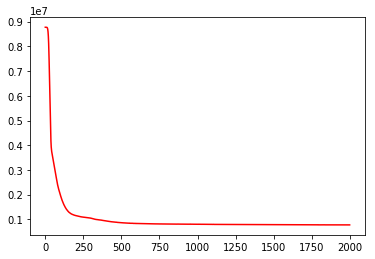

In [14]:
pd.Series(trainingshistorie_stadt.history["loss"]).plot(color="red")


<h1 align="center"> TEST UND TRAININGS DATEN ERZEUGEN <u>FÜR GEMEINDE MODELL</u></h1>

In [15]:
learning_data_gem = learning_data[learning_data["REGIONSTYP"] == "gem"].copy()
prediction_data_gem = prediction_data[prediction_data["REGIONSTYP"] == "gem"].copy()


train_set_gem, test_set_gem = train_test_split(learning_data_gem, test_size=test_set_size, random_state=seed)



y_train_gem = train_set_gem[pred_col].astype(np.float64)
x_train_unscaled_gem = train_set_gem[input_features].astype(np.float64).values

y_test_gem = test_set_gem[pred_col].astype(np.float64)
x_test_unscaled_gem = test_set_gem[input_features].astype(np.float64).values


x_train_scaled_gem = scaler.fit_transform(x_train_unscaled_gem)
x_test_scaled_gem = scaler.fit_transform(x_test_unscaled_gem)


display(
    "Rows im gesamten Datensatz:  " + str(len(data)),
    "Rows im Learning-Datensatz:  " + str(len(learning_data_gem)),
    "      Rows im Trainings-Datensatz:  " + str(len(y_train_gem)),
    "      Rows im Test-Datensatz:       " + str(len(y_test_gem)),
    "Rows im Prediction-Datensatz: " + str(len(prediction_data_gem))
)



'Rows im gesamten Datensatz:  9571'

'Rows im Learning-Datensatz:  604'

'      Rows im Trainings-Datensatz:  483'

'      Rows im Test-Datensatz:       121'

'Rows im Prediction-Datensatz: 6626'

In [16]:
#y_train
x_train_unscaled_gem

array([[1.390e+02, 2.320e+02, 2.982e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.310e+02, 1.860e+02, 2.841e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.850e+02, 2.920e+02, 3.704e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.800e+01, 1.900e+01, 5.880e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.400e+01, 1.260e+02, 1.883e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.680e+02, 1.650e+02, 4.397e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

<h1>DURCHFÜHRUNG UND VALIDIERUNG DES NEURONALEN NETZWERKS</h1>

In [17]:
trainingshistorie_gem = NN.ﬁt(x_train_scaled_gem, y_train_gem, epochs=2000, verbose=True)


y_test_vorhersage_gem = np.round(NN.predict(x_test_scaled_gem).reshape(x_test_scaled_gem.shape[0],))


Epoch 1/2000
483/483 [==============================] - 0s 32us/step - loss: 3224067.0362
Epoch 2/2000
483/483 [==============================] - 0s 65us/step - loss: 2518011.1599
Epoch 3/2000
483/483 [==============================] - 0s 65us/step - loss: 1825825.2134
Epoch 4/2000
483/483 [==============================] - 0s 32us/step - loss: 1302032.8385
Epoch 5/2000
483/483 [==============================] - 0s 97us/step - loss: 959652.2217
Epoch 6/2000
483/483 [==============================] - 0s 32us/step - loss: 780115.6191
Epoch 7/2000
483/483 [==============================] - 0s 65us/step - loss: 703268.7313
Epoch 8/2000
483/483 [==============================] - 0s 97us/step - loss: 666132.9408
Epoch 9/2000
483/483 [==============================] - 0s 65us/step - loss: 639598.0010
Epoch 10/2000
483/483 [==============================] - 0s 97us/step - loss: 624845.8731
Epoch 11/2000
483/483 [==============================] - 0s 65us/step - loss: 616529.1909
Epoch 12/2000
4

483/483 [==============================] - 0s 65us/step - loss: 560270.4011
Epoch 93/2000
483/483 [==============================] - 0s 65us/step - loss: 560811.1729
Epoch 94/2000
483/483 [==============================] - 0s 32us/step - loss: 560459.3014
Epoch 95/2000
483/483 [==============================] - 0s 65us/step - loss: 559957.7958
Epoch 96/2000
483/483 [==============================] - 0s 32us/step - loss: 560639.9746
Epoch 97/2000
483/483 [==============================] - 0s 65us/step - loss: 559711.9591
Epoch 98/2000
483/483 [==============================] - 0s 32us/step - loss: 559973.9982
Epoch 99/2000
483/483 [==============================] - 0s 32us/step - loss: 560437.2776
Epoch 100/2000
483/483 [==============================] - 0s 32us/step - loss: 559790.4763
Epoch 101/2000
483/483 [==============================] - 0s 32us/step - loss: 560231.8238
Epoch 102/2000
483/483 [==============================] - 0s 65us/step - loss: 559705.9959
Epoch 103/2000
483/48

483/483 [==============================] - 0s 97us/step - loss: 547329.6999
Epoch 182/2000
483/483 [==============================] - 0s 97us/step - loss: 546035.8918
Epoch 183/2000
483/483 [==============================] - 0s 124us/step - loss: 546419.1715
Epoch 184/2000
483/483 [==============================] - 0s 62us/step - loss: 546177.6573
Epoch 185/2000
483/483 [==============================] - ETA: 0s - loss: 575020.81 - 0s 65us/step - loss: 546672.1844
Epoch 186/2000
483/483 [==============================] - 0s 97us/step - loss: 546314.6439
Epoch 187/2000
483/483 [==============================] - 0s 65us/step - loss: 545260.6784
Epoch 188/2000
483/483 [==============================] - 0s 65us/step - loss: 546068.7242
Epoch 189/2000
483/483 [==============================] - 0s 65us/step - loss: 545525.6501
Epoch 190/2000
483/483 [==============================] - 0s 65us/step - loss: 545499.7147
Epoch 191/2000
483/483 [==============================] - 0s 65us/step - los

483/483 [==============================] - 0s 65us/step - loss: 540175.7085
Epoch 271/2000
483/483 [==============================] - 0s 32us/step - loss: 541157.2155
Epoch 272/2000
483/483 [==============================] - 0s 65us/step - loss: 540968.5062
Epoch 273/2000
483/483 [==============================] - 0s 32us/step - loss: 540071.5269
Epoch 274/2000
483/483 [==============================] - 0s 65us/step - loss: 539317.1128
Epoch 275/2000
483/483 [==============================] - 0s 32us/step - loss: 539638.9793
Epoch 276/2000
483/483 [==============================] - 0s 65us/step - loss: 539123.8454
Epoch 277/2000
483/483 [==============================] - 0s 32us/step - loss: 539660.9899
Epoch 278/2000
483/483 [==============================] - 0s 32us/step - loss: 539404.5294
Epoch 279/2000
483/483 [==============================] - 0s 65us/step - loss: 539648.3064
Epoch 280/2000
483/483 [==============================] - 0s 32us/step - loss: 539418.9876
Epoch 281/2000

483/483 [==============================] - 0s 65us/step - loss: 534355.8789
Epoch 361/2000
483/483 [==============================] - 0s 65us/step - loss: 535251.6765
Epoch 362/2000
483/483 [==============================] - 0s 65us/step - loss: 533987.9720
Epoch 363/2000
483/483 [==============================] - 0s 32us/step - loss: 534129.0000
Epoch 364/2000
483/483 [==============================] - 0s 32us/step - loss: 534893.2454
Epoch 365/2000
483/483 [==============================] - 0s 32us/step - loss: 534013.8199
Epoch 366/2000
483/483 [==============================] - 0s 32us/step - loss: 533724.0682
Epoch 367/2000
483/483 [==============================] - 0s 65us/step - loss: 533487.5093
Epoch 368/2000
483/483 [==============================] - 0s 32us/step - loss: 533684.4526
Epoch 369/2000
483/483 [==============================] - 0s 32us/step - loss: 533156.2642
Epoch 370/2000
483/483 [==============================] - 0s 65us/step - loss: 533755.1095
Epoch 371/2000

483/483 [==============================] - 0s 32us/step - loss: 529810.8675
Epoch 451/2000
483/483 [==============================] - 0s 32us/step - loss: 528949.8037
Epoch 452/2000
483/483 [==============================] - 0s 32us/step - loss: 530249.5631
Epoch 453/2000
483/483 [==============================] - 0s 65us/step - loss: 529835.6229
Epoch 454/2000
483/483 [==============================] - 0s 32us/step - loss: 529117.2858
Epoch 455/2000
483/483 [==============================] - 0s 65us/step - loss: 530783.7525
Epoch 456/2000
483/483 [==============================] - 0s 65us/step - loss: 530235.0465
Epoch 457/2000
483/483 [==============================] - 0s 32us/step - loss: 530427.9490
Epoch 458/2000
483/483 [==============================] - 0s 32us/step - loss: 530033.0371
Epoch 459/2000
483/483 [==============================] - 0s 32us/step - loss: 529795.5360
Epoch 460/2000
483/483 [==============================] - 0s 65us/step - loss: 529332.6548
Epoch 461/2000

483/483 [==============================] - 0s 65us/step - loss: 525880.4556
Epoch 541/2000
483/483 [==============================] - 0s 32us/step - loss: 524577.6363
Epoch 542/2000
483/483 [==============================] - 0s 65us/step - loss: 525819.8426
Epoch 543/2000
483/483 [==============================] - 0s 32us/step - loss: 526112.3654
Epoch 544/2000
483/483 [==============================] - 0s 32us/step - loss: 525084.0919
Epoch 545/2000
483/483 [==============================] - 0s 65us/step - loss: 525684.3064
Epoch 546/2000
483/483 [==============================] - 0s 32us/step - loss: 527370.4039
Epoch 547/2000
483/483 [==============================] - 0s 32us/step - loss: 524725.4520
Epoch 548/2000
483/483 [==============================] - 0s 65us/step - loss: 524955.5104
Epoch 549/2000
483/483 [==============================] - 0s 32us/step - loss: 525037.0404
Epoch 550/2000
483/483 [==============================] - 0s 32us/step - loss: 525164.8872
Epoch 551/2000

483/483 [==============================] - 0s 32us/step - loss: 523412.8220
Epoch 631/2000
483/483 [==============================] - 0s 32us/step - loss: 523271.2282
Epoch 632/2000
483/483 [==============================] - 0s 65us/step - loss: 522653.6323
Epoch 633/2000
483/483 [==============================] - 0s 32us/step - loss: 522346.3432
Epoch 634/2000
483/483 [==============================] - 0s 32us/step - loss: 522773.4001
Epoch 635/2000
483/483 [==============================] - 0s 32us/step - loss: 523354.4669
Epoch 636/2000
483/483 [==============================] - 0s 65us/step - loss: 522549.9058
Epoch 637/2000
483/483 [==============================] - 0s 32us/step - loss: 521945.0767
Epoch 638/2000
483/483 [==============================] - 0s 32us/step - loss: 523116.2541
Epoch 639/2000
483/483 [==============================] - 0s 65us/step - loss: 522650.3955
Epoch 640/2000
483/483 [==============================] - 0s 65us/step - loss: 522203.4139
Epoch 641/2000

483/483 [==============================] - 0s 32us/step - loss: 520209.8454
Epoch 721/2000
483/483 [==============================] - 0s 32us/step - loss: 519530.5203
Epoch 722/2000
483/483 [==============================] - 0s 32us/step - loss: 520152.4216
Epoch 723/2000
483/483 [==============================] - 0s 32us/step - loss: 520180.0890
Epoch 724/2000
483/483 [==============================] - 0s 32us/step - loss: 521143.4379
Epoch 725/2000
483/483 [==============================] - 0s 65us/step - loss: 520608.2325
Epoch 726/2000
483/483 [==============================] - 0s 32us/step - loss: 520075.0672
Epoch 727/2000
483/483 [==============================] - 0s 32us/step - loss: 520762.4022
Epoch 728/2000
483/483 [==============================] - 0s 32us/step - loss: 520031.7386
Epoch 729/2000
483/483 [==============================] - 0s 65us/step - loss: 519968.7133
Epoch 730/2000
483/483 [==============================] - 0s 32us/step - loss: 520762.2780
Epoch 731/2000

483/483 [==============================] - 0s 32us/step - loss: 518187.9505
Epoch 811/2000
483/483 [==============================] - 0s 65us/step - loss: 518600.2698
Epoch 812/2000
483/483 [==============================] - 0s 32us/step - loss: 517920.1848
Epoch 813/2000
483/483 [==============================] - 0s 32us/step - loss: 517539.5388
Epoch 814/2000
483/483 [==============================] - 0s 65us/step - loss: 518042.6341
Epoch 815/2000
483/483 [==============================] - 0s 32us/step - loss: 517096.8670
Epoch 816/2000
483/483 [==============================] - 0s 65us/step - loss: 517519.3428
Epoch 817/2000
483/483 [==============================] - 0s 65us/step - loss: 516817.4674
Epoch 818/2000
483/483 [==============================] - 0s 32us/step - loss: 517054.8514
Epoch 819/2000
483/483 [==============================] - 0s 65us/step - loss: 517255.5745
Epoch 820/2000
483/483 [==============================] - 0s 32us/step - loss: 517410.6342
Epoch 821/2000

483/483 [==============================] - 0s 32us/step - loss: 515181.6879
Epoch 900/2000
483/483 [==============================] - 0s 65us/step - loss: 514929.7370
Epoch 901/2000
483/483 [==============================] - 0s 32us/step - loss: 515960.2050
Epoch 902/2000
483/483 [==============================] - 0s 65us/step - loss: 515899.8920
Epoch 903/2000
483/483 [==============================] - 0s 32us/step - loss: 514373.5523
Epoch 904/2000
483/483 [==============================] - 0s 32us/step - loss: 515517.4834
Epoch 905/2000
483/483 [==============================] - 0s 65us/step - loss: 515189.5357
Epoch 906/2000
483/483 [==============================] - 0s 32us/step - loss: 515008.3953
Epoch 907/2000
483/483 [==============================] - 0s 32us/step - loss: 515777.6715
Epoch 908/2000
483/483 [==============================] - 0s 32us/step - loss: 515100.2272
Epoch 909/2000
483/483 [==============================] - 0s 65us/step - loss: 516676.8209
Epoch 910/2000

483/483 [==============================] - 0s 65us/step - loss: 513565.7144
Epoch 990/2000
483/483 [==============================] - 0s 32us/step - loss: 513300.2923
Epoch 991/2000
483/483 [==============================] - 0s 32us/step - loss: 514843.3058
Epoch 992/2000
483/483 [==============================] - 0s 32us/step - loss: 512711.6821
Epoch 993/2000
483/483 [==============================] - 0s 32us/step - loss: 512977.1817
Epoch 994/2000
483/483 [==============================] - 0s 32us/step - loss: 513376.6429
Epoch 995/2000
483/483 [==============================] - 0s 32us/step - loss: 512995.1269
Epoch 996/2000
483/483 [==============================] - 0s 32us/step - loss: 514122.3505
Epoch 997/2000
483/483 [==============================] - 0s 32us/step - loss: 511087.9557
Epoch 998/2000
483/483 [==============================] - 0s 32us/step - loss: 515501.9109
Epoch 999/2000
483/483 [==============================] - 0s 32us/step - loss: 515337.3564
Epoch 1000/200

483/483 [==============================] - 0s 65us/step - loss: 512483.8448
Epoch 1079/2000
483/483 [==============================] - 0s 32us/step - loss: 511554.4617
Epoch 1080/2000
483/483 [==============================] - 0s 65us/step - loss: 511514.7572
Epoch 1081/2000
483/483 [==============================] - 0s 32us/step - loss: 511369.4214
Epoch 1082/2000
483/483 [==============================] - 0s 65us/step - loss: 511295.7112
Epoch 1083/2000
483/483 [==============================] - 0s 32us/step - loss: 511312.9400
Epoch 1084/2000
483/483 [==============================] - 0s 32us/step - loss: 511073.3090
Epoch 1085/2000
483/483 [==============================] - 0s 65us/step - loss: 511417.7329
Epoch 1086/2000
483/483 [==============================] - 0s 32us/step - loss: 511097.3644
Epoch 1087/2000
483/483 [==============================] - 0s 32us/step - loss: 511183.4932
Epoch 1088/2000
483/483 [==============================] - 0s 65us/step - loss: 511491.1748
Epoc

483/483 [==============================] - 0s 65us/step - loss: 510326.5581
Epoch 1168/2000
483/483 [==============================] - 0s 32us/step - loss: 510895.4782
Epoch 1169/2000
483/483 [==============================] - 0s 32us/step - loss: 510294.3456
Epoch 1170/2000
483/483 [==============================] - 0s 32us/step - loss: 510005.8375
Epoch 1171/2000
483/483 [==============================] - 0s 32us/step - loss: 510557.4636
Epoch 1172/2000
483/483 [==============================] - 0s 32us/step - loss: 510702.4332
Epoch 1173/2000
483/483 [==============================] - 0s 32us/step - loss: 511612.7681
Epoch 1174/2000
483/483 [==============================] - 0s 65us/step - loss: 510343.7531
Epoch 1175/2000
483/483 [==============================] - 0s 32us/step - loss: 509957.9742
Epoch 1176/2000
483/483 [==============================] - 0s 32us/step - loss: 510999.5802
Epoch 1177/2000
483/483 [==============================] - 0s 65us/step - loss: 510712.5584
Epoc

483/483 [==============================] - 0s 32us/step - loss: 508992.0264
Epoch 1257/2000
483/483 [==============================] - 0s 32us/step - loss: 509130.5848
Epoch 1258/2000
483/483 [==============================] - 0s 32us/step - loss: 508861.4200
Epoch 1259/2000
483/483 [==============================] - 0s 65us/step - loss: 510074.5688
Epoch 1260/2000
483/483 [==============================] - 0s 32us/step - loss: 509287.1806
Epoch 1261/2000
483/483 [==============================] - 0s 32us/step - loss: 508644.6852
Epoch 1262/2000
483/483 [==============================] - 0s 65us/step - loss: 508838.7209
Epoch 1263/2000
483/483 [==============================] - 0s 32us/step - loss: 509666.0325
Epoch 1264/2000
483/483 [==============================] - 0s 65us/step - loss: 509943.1748
Epoch 1265/2000
483/483 [==============================] - 0s 65us/step - loss: 508983.0228
Epoch 1266/2000
483/483 [==============================] - 0s 32us/step - loss: 510324.8556
Epoc

483/483 [==============================] - 0s 32us/step - loss: 508340.9033
Epoch 1346/2000
483/483 [==============================] - 0s 32us/step - loss: 509033.9680
Epoch 1347/2000
483/483 [==============================] - 0s 32us/step - loss: 508113.0236
Epoch 1348/2000
483/483 [==============================] - 0s 65us/step - loss: 508664.9778
Epoch 1349/2000
483/483 [==============================] - 0s 32us/step - loss: 508138.1361
Epoch 1350/2000
483/483 [==============================] - 0s 65us/step - loss: 507996.4483
Epoch 1351/2000
483/483 [==============================] - 0s 32us/step - loss: 508000.0745
Epoch 1352/2000
483/483 [==============================] - 0s 32us/step - loss: 507397.0357
Epoch 1353/2000
483/483 [==============================] - 0s 65us/step - loss: 508547.1537
Epoch 1354/2000
483/483 [==============================] - 0s 65us/step - loss: 507981.2702
Epoch 1355/2000
483/483 [==============================] - 0s 32us/step - loss: 508020.6117
Epoc

483/483 [==============================] - 0s 32us/step - loss: 506972.1061
Epoch 1435/2000
483/483 [==============================] - 0s 65us/step - loss: 507103.1179
Epoch 1436/2000
483/483 [==============================] - 0s 32us/step - loss: 506905.0087
Epoch 1437/2000
483/483 [==============================] - 0s 32us/step - loss: 506834.4435
Epoch 1438/2000
483/483 [==============================] - 0s 65us/step - loss: 507308.4648
Epoch 1439/2000
483/483 [==============================] - 0s 32us/step - loss: 506875.2841
Epoch 1440/2000
483/483 [==============================] - 0s 65us/step - loss: 507437.7622
Epoch 1441/2000
483/483 [==============================] - 0s 32us/step - loss: 507481.7893
Epoch 1442/2000
483/483 [==============================] - 0s 65us/step - loss: 506847.7512
Epoch 1443/2000
483/483 [==============================] - 0s 32us/step - loss: 506886.8214
Epoch 1444/2000
483/483 [==============================] - 0s 32us/step - loss: 507227.2082
Epoc

483/483 [==============================] - 0s 65us/step - loss: 506164.8168
Epoch 1524/2000
483/483 [==============================] - 0s 32us/step - loss: 507038.3861
Epoch 1525/2000
483/483 [==============================] - 0s 32us/step - loss: 506509.2516
Epoch 1526/2000
483/483 [==============================] - 0s 65us/step - loss: 506121.2365
Epoch 1527/2000
483/483 [==============================] - 0s 32us/step - loss: 506141.4803
Epoch 1528/2000
483/483 [==============================] - 0s 32us/step - loss: 506093.5383
Epoch 1529/2000
483/483 [==============================] - 0s 65us/step - loss: 506447.0787
Epoch 1530/2000
483/483 [==============================] - 0s 65us/step - loss: 506661.2977
Epoch 1531/2000
483/483 [==============================] - 0s 32us/step - loss: 506611.5723
Epoch 1532/2000
483/483 [==============================] - 0s 65us/step - loss: 505663.1216
Epoch 1533/2000
483/483 [==============================] - 0s 32us/step - loss: 506304.1524
Epoc

483/483 [==============================] - 0s 32us/step - loss: 505237.7697
Epoch 1613/2000
483/483 [==============================] - 0s 32us/step - loss: 507097.5181
Epoch 1614/2000
483/483 [==============================] - 0s 65us/step - loss: 505042.5216
Epoch 1615/2000
483/483 [==============================] - 0s 32us/step - loss: 506615.4431
Epoch 1616/2000
483/483 [==============================] - 0s 32us/step - loss: 509430.8985
Epoch 1617/2000
483/483 [==============================] - 0s 32us/step - loss: 507459.7155
Epoch 1618/2000
483/483 [==============================] - 0s 32us/step - loss: 506697.3645
Epoch 1619/2000
483/483 [==============================] - 0s 32us/step - loss: 506049.2976
Epoch 1620/2000
483/483 [==============================] - 0s 32us/step - loss: 505296.6015
Epoch 1621/2000
483/483 [==============================] - 0s 32us/step - loss: 505993.7499
Epoch 1622/2000
483/483 [==============================] - 0s 32us/step - loss: 506726.8892
Epoc

483/483 [==============================] - 0s 32us/step - loss: 504339.4161
Epoch 1702/2000
483/483 [==============================] - 0s 32us/step - loss: 505158.1754
Epoch 1703/2000
483/483 [==============================] - 0s 32us/step - loss: 504507.1201
Epoch 1704/2000
483/483 [==============================] - 0s 32us/step - loss: 504894.5420
Epoch 1705/2000
483/483 [==============================] - 0s 32us/step - loss: 505343.1616
Epoch 1706/2000
483/483 [==============================] - 0s 32us/step - loss: 504567.8084
Epoch 1707/2000
483/483 [==============================] - 0s 65us/step - loss: 504604.1801
Epoch 1708/2000
483/483 [==============================] - 0s 32us/step - loss: 504150.8643
Epoch 1709/2000
483/483 [==============================] - 0s 32us/step - loss: 504675.1616
Epoch 1710/2000
483/483 [==============================] - 0s 32us/step - loss: 504287.4384
Epoch 1711/2000
483/483 [==============================] - 0s 32us/step - loss: 504205.0073
Epoc

483/483 [==============================] - 0s 32us/step - loss: 503494.5485
Epoch 1790/2000
483/483 [==============================] - 0s 32us/step - loss: 503056.0890
Epoch 1791/2000
483/483 [==============================] - 0s 65us/step - loss: 503816.7484
Epoch 1792/2000
483/483 [==============================] - 0s 32us/step - loss: 503531.0120
Epoch 1793/2000
483/483 [==============================] - 0s 46us/step - loss: 502906.0971
Epoch 1794/2000
483/483 [==============================] - 0s 65us/step - loss: 503535.7650
Epoch 1795/2000
483/483 [==============================] - 0s 65us/step - loss: 504793.0756
Epoch 1796/2000
483/483 [==============================] - 0s 32us/step - loss: 503702.4865
Epoch 1797/2000
483/483 [==============================] - 0s 46us/step - loss: 503763.1982
Epoch 1798/2000
483/483 [==============================] - 0s 65us/step - loss: 503184.6837
Epoch 1799/2000
483/483 [==============================] - 0s 65us/step - loss: 503546.4591
Epoc

483/483 [==============================] - 0s 32us/step - loss: 504037.5010
Epoch 1879/2000
483/483 [==============================] - 0s 65us/step - loss: 502615.7469
Epoch 1880/2000
483/483 [==============================] - 0s 32us/step - loss: 503189.2172
Epoch 1881/2000
483/483 [==============================] - 0s 46us/step - loss: 503120.0611
Epoch 1882/2000
483/483 [==============================] - 0s 65us/step - loss: 502763.8722
Epoch 1883/2000
483/483 [==============================] - 0s 32us/step - loss: 502648.9432
Epoch 1884/2000
483/483 [==============================] - 0s 32us/step - loss: 503544.7444
Epoch 1885/2000
483/483 [==============================] - 0s 65us/step - loss: 503727.3054
Epoch 1886/2000
483/483 [==============================] - 0s 46us/step - loss: 503741.8437
Epoch 1887/2000
483/483 [==============================] - 0s 32us/step - loss: 502904.5511
Epoch 1888/2000
483/483 [==============================] - 0s 32us/step - loss: 504320.3391
Epoc

483/483 [==============================] - 0s 32us/step - loss: 504025.8111
Epoch 1967/2000
483/483 [==============================] - 0s 32us/step - loss: 504010.9744
Epoch 1968/2000
483/483 [==============================] - 0s 32us/step - loss: 502334.2111
Epoch 1969/2000
483/483 [==============================] - 0s 46us/step - loss: 502230.7158
Epoch 1970/2000
483/483 [==============================] - 0s 65us/step - loss: 502537.3391
Epoch 1971/2000
483/483 [==============================] - 0s 65us/step - loss: 502451.1520
Epoch 1972/2000
483/483 [==============================] - 0s 32us/step - loss: 502854.6646
Epoch 1973/2000
483/483 [==============================] - 0s 46us/step - loss: 502886.3133
Epoch 1974/2000
483/483 [==============================] - 0s 32us/step - loss: 502249.2184
Epoch 1975/2000
483/483 [==============================] - 0s 32us/step - loss: 501935.0148
Epoch 1976/2000
483/483 [==============================] - 0s 32us/step - loss: 502837.3867
Epoc

In [19]:
get_regression_metrics(y_test_gem, y_test_vorhersage_gem)

mse     2406841192131.8496
rmse          1551399.7525
mae           1064702.1249
medae          744710.9200
r2                  0.8338
dtype: float64

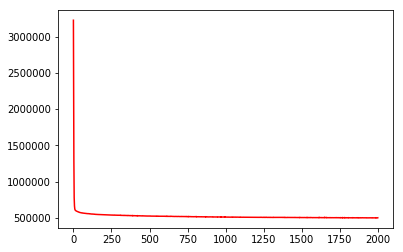

In [20]:
pd.Series(trainingshistorie_gem.history["loss"]).plot(color="red")


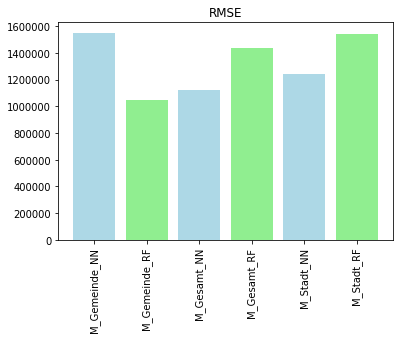

In [51]:
index = ["M_Gesamt_NN", "M_Gesamt_RF","M_Stadt_NN", "M_Stadt_RF","M_Gemeinde_NN", "M_Gemeinde_RF"]
columns = ["RMSE"]
data = [1124155, 1437940, 1242490, 1544873, 1551399, 1046136]
rmse_data = pd.DataFrame(columns=columns, index=index, data=data)

plt.bar(index, rmse_data["RMSE"], color=["lightblue", "lightgreen", "lightblue", "lightgreen", "lightblue", "lightgreen"])
plt.xticks(rotation=90)
plt.title("RMSE")
plt.show()

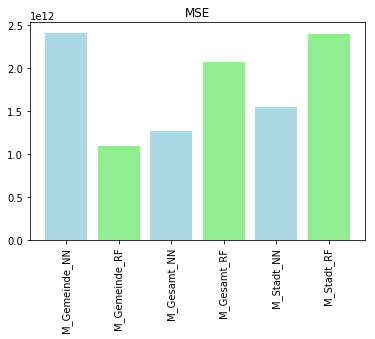

In [52]:
index = ["M_Gesamt_NN", "M_Gesamt_RF","M_Stadt_NN", "M_Stadt_RF","M_Gemeinde_NN", "M_Gemeinde_RF"]
columns = ["MSE"]
data = [1263725349050, 2067673400040, 1543781835578, 2386634630438, 2406841192131, 1094401459828]
mse_data = pd.DataFrame(columns=columns, index=index, data=data)

plt.bar(index, mse_data["MSE"], color=["lightblue", "lightgreen", "lightblue", "lightgreen", "lightblue", "lightgreen"])
plt.xticks(rotation=90)
plt.title("MSE")
plt.show()

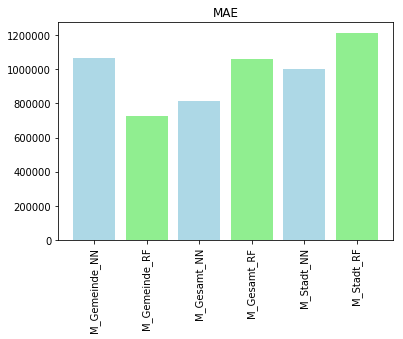

In [53]:
index = ["M_Gesamt_NN", "M_Gesamt_RF","M_Stadt_NN", "M_Stadt_RF","M_Gemeinde_NN", "M_Gemeinde_RF"]
columns = ["MAE"]
data = [815594, 1061522, 1002448, 1214986, 1064702, 725650]
mae_data = pd.DataFrame(columns=columns, index=index, data=data)

plt.bar(index, mae_data["MAE"], color=["lightblue", "lightgreen", "lightblue", "lightgreen", "lightblue", "lightgreen"])
plt.xticks(rotation=90)
plt.title("MAE")
plt.show()

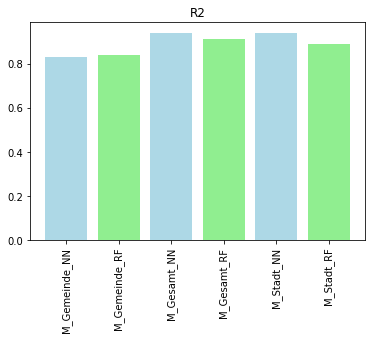

In [56]:
index = ["M_Gesamt_NN", "M_Gesamt_RF","M_Stadt_NN", "M_Stadt_RF","M_Gemeinde_NN", "M_Gemeinde_RF"]
columns = ["R2"]
data = [0.94, 0.91, 0.94, 0.89, 0.83, 0.84]
r2_data = pd.DataFrame(columns=columns, index=index, data=data)

plt.bar(index, r2_data["R2"], color=["lightblue", "lightgreen", "lightblue", "lightgreen", "lightblue", "lightgreen"])
plt.xticks(rotation=90)
plt.title("R2")
plt.show()